In [1]:
import pandas as pd
df = pd.read_csv("../data/processed/goa_cleaned.csv")
df.head()


,location,bhk,price,sq_feet,latitude,longitude,bhk_num,price_per_sqft
0,Mapusa,Office Space,100000,77.0,15.590853,73.810215,0.0,1298.701299
1,Taleigao,2 BHK,10000000,11905.0,15.470266,73.822567,2.0,839.983200
2,Calangute,2 BHK,10000000,12500.0,15.545594,73.764618,2.0,800.000000
3,Tuem,Land,10000000,2714.0,15.666568,73.795665,0.0,3684.598379
4,Bainguinim,2 BHK,10000000,7492.0,15.500349,73.902288,2.0,1334.757074


In [2]:
df[['price', 'sq_feet', 'bhk_num', 'price_per_sqft']].describe().T


,count,mean,std,min,25%,50%,75%,max
price,2414.0,3.297665e+07,4.219753e+07,100000.000000,7.800000e+06,1.520000e+07,4.650000e+07,4.500000e+08
sq_feet,2414.0,1.135511e+04,7.291078e+03,31.000000,6.000000e+03,9.771000e+03,1.530950e+04,4.969100e+04
bhk_num,2414.0,2.090721e+00,1.534131e+00,0.000000,1.000000e+00,2.000000e+00,3.000000e+00,1.000000e+01
price_per_sqft,2414.0,5.648333e+03,2.284882e+04,48.981944,1.023248e+03,1.688499e+03,3.709471e+03,3.984064e+05


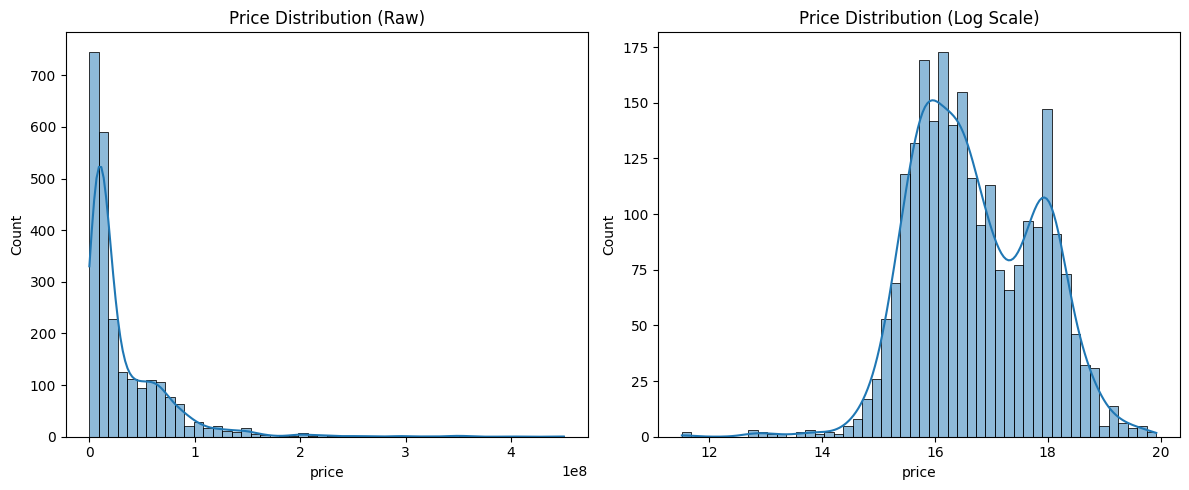

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution (Raw)")

plt.subplot(1,2,2)
sns.histplot(np.log1p(df['price']), bins=50, kde=True)
plt.title("Price Distribution (Log Scale)")

plt.tight_layout()
plt.show()


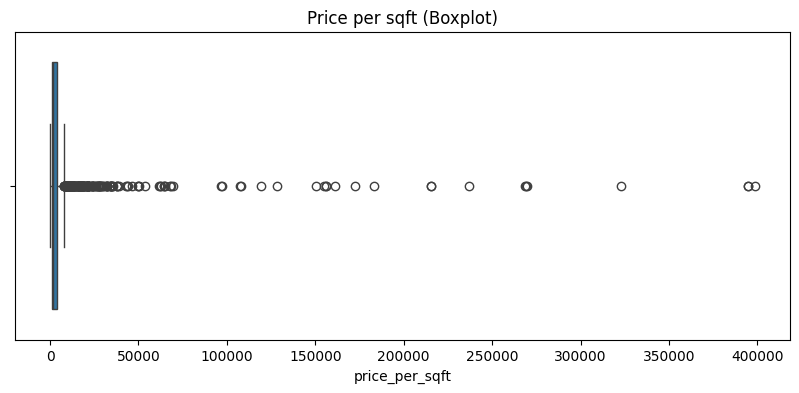

count      2414.000000
mean       5648.333183
std       22848.816288
min          48.981944
25%        1023.248495
50%        1688.499181
75%        3709.470577
max      398406.374502
Name: price_per_sqft, dtype: float64

In [4]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df['price_per_sqft'])
plt.title("Price per sqft (Boxplot)")
plt.show()

df['price_per_sqft'].describe()


C:\Users\Aditya\AppData\Local\Temp\ipykernel_11440\3560811980.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_localities.index, x=top_localities.values, palette="viridis")


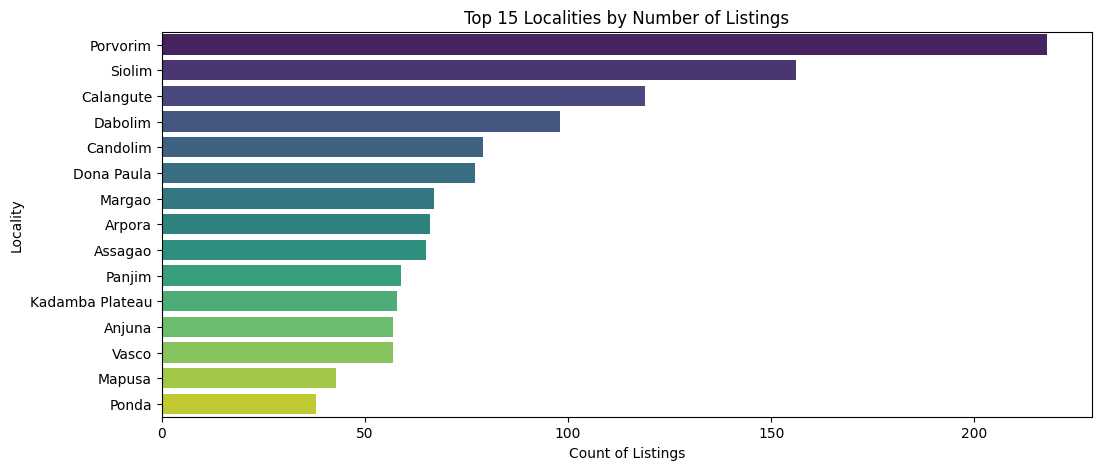

C:\Users\Aditya\AppData\Local\Temp\ipykernel_11440\3560811980.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=median_prices.index, x=median_prices.values, palette="magma")


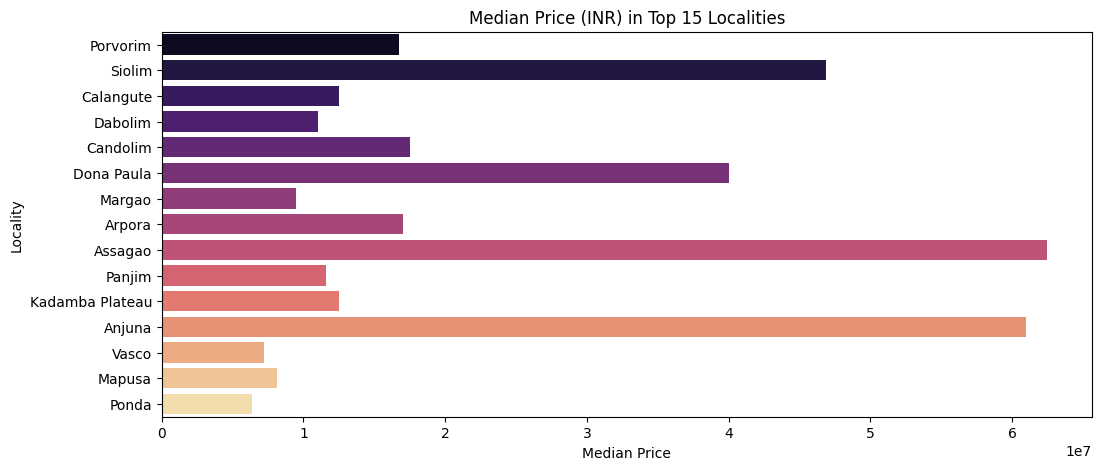

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 15 localities by number of listings
top_localities = df['location'].value_counts().nlargest(15)

plt.figure(figsize=(12,5))
sns.barplot(y=top_localities.index, x=top_localities.values, palette="viridis")
plt.title("Top 15 Localities by Number of Listings")
plt.xlabel("Count of Listings")
plt.ylabel("Locality")
plt.show()

# Median price by top 15 localities
median_prices = df.groupby('location')['price'].median().loc[top_localities.index]

plt.figure(figsize=(12,5))
sns.barplot(y=median_prices.index, x=median_prices.values, palette="magma")
plt.title("Median Price (INR) in Top 15 Localities")
plt.xlabel("Median Price")
plt.ylabel("Locality")
plt.show()


C:\Users\Aditya\AppData\Local\Temp\ipykernel_11440\3898587076.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='bhk_num', y='price', palette="coolwarm")


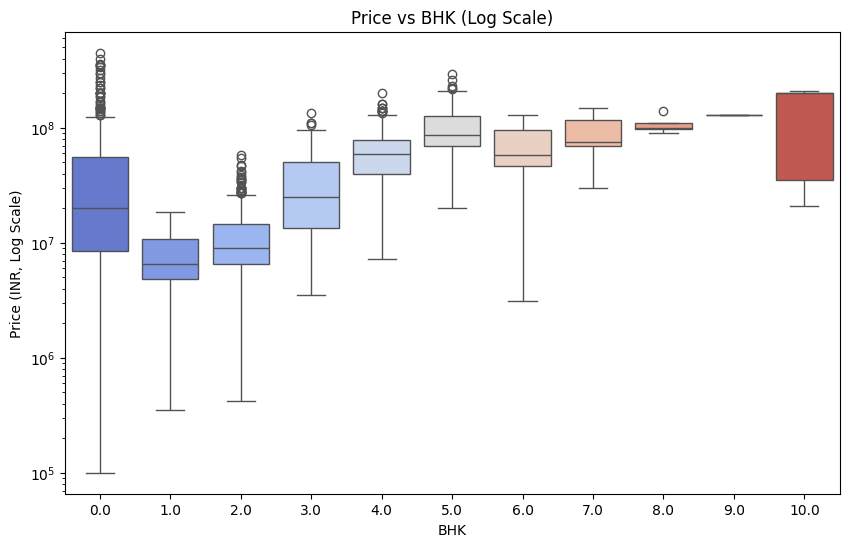

In [6]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='bhk_num', y='price', palette="coolwarm")
plt.yscale('log')  # Log scale makes the distribution readable
plt.title("Price vs BHK (Log Scale)")
plt.xlabel("BHK")
plt.ylabel("Price (INR, Log Scale)")
plt.show()


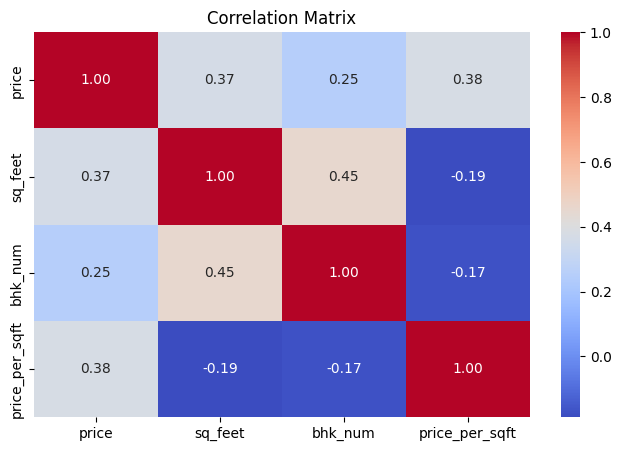

In [7]:
import numpy as np

plt.figure(figsize=(8,5))
corr = df[['price', 'sq_feet', 'bhk_num', 'price_per_sqft']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


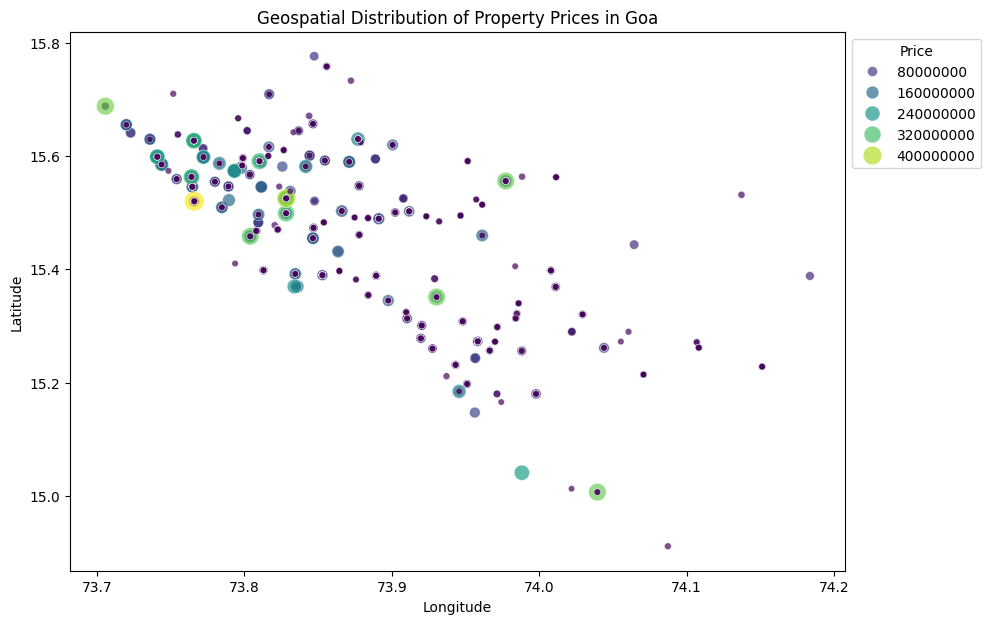

In [8]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df,
    x='longitude',
    y='latitude',
    hue='price',
    palette='viridis',
    size='price',
    sizes=(20, 200),
    alpha=0.7
)

plt.title("Geospatial Distribution of Property Prices in Goa")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Price", loc="upper left", bbox_to_anchor=(1,1))
plt.show()


In [9]:
# IQR for price_per_sqft
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

# Filter outliers
df_clean = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]

print("Original rows:", len(df))
print("Cleaned rows:", len(df_clean))
print("Rows removed:", len(df) - len(df_clean))


Lower bound: -3006.084627733835
Upper bound: 7738.803699884265
Original rows: 2414
Cleaned rows: 2190
Rows removed: 224


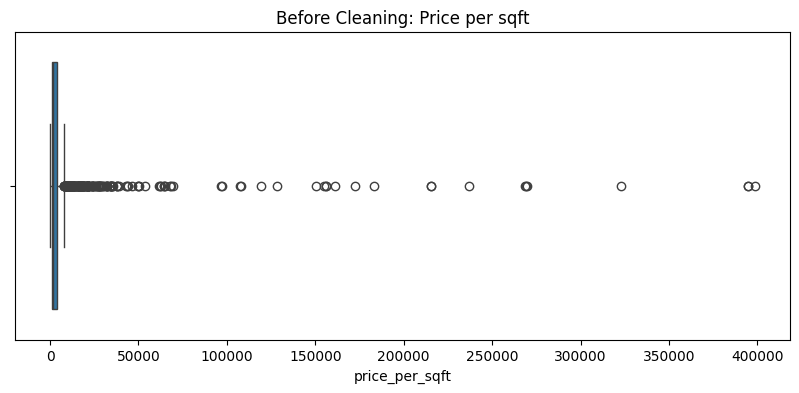

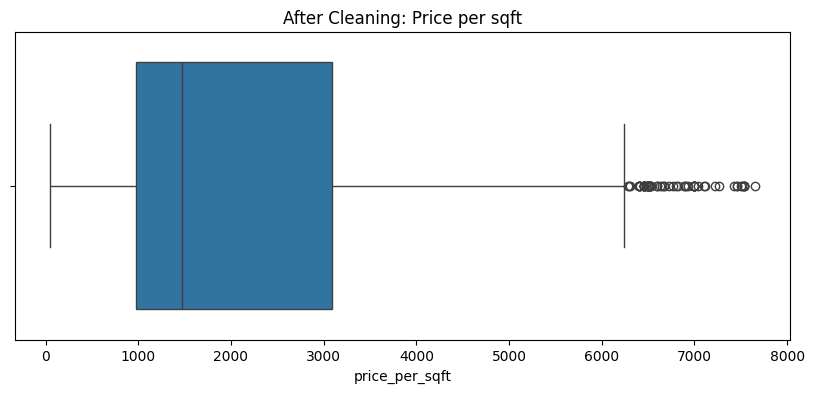

In [10]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df['price_per_sqft'])
plt.title("Before Cleaning: Price per sqft")
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x=df_clean['price_per_sqft'])
plt.title("After Cleaning: Price per sqft")
plt.show()


In [11]:
df_clean[['price', 'sq_feet', 'bhk_num', 'price_per_sqft']].describe().T


,count,mean,std,min,25%,50%,75%,max
price,2190.0,2.696734e+07,2.975096e+07,100000.000000,7.500000e+06,1.400000e+07,3.750000e+07,2.600000e+08
sq_feet,2190.0,1.201753e+04,7.102024e+03,31.000000,6.709000e+03,1.064900e+04,1.627125e+04,4.969100e+04
bhk_num,2190.0,2.249315e+00,1.410959e+00,0.000000,1.000000e+00,2.000000e+00,3.000000e+00,1.000000e+01
price_per_sqft,2190.0,2.164534e+03,1.638249e+03,48.981944,9.706698e+02,1.469988e+03,3.088943e+03,7.649744e+03


In [12]:
print("✨ EDA Summary ✨")
print("----------------------------")
print(f"Original rows: {len(df)}")
print(f"Cleaned rows: {len(df_clean)}")
print(f"Removed outliers: {len(df) - len(df_clean)}")
print("\nKey Insights:")
print("1. Price distribution is highly right-skewed; modeling log(price) is recommended.")
print("2. Location dominates pricing patterns (clear clusters on map).")
print("3. Square feet correlates moderately with price; BHK is a weak predictor.")
print("4. Price-per-sqft had unrealistic outliers; IQR cleaning removed ~9% of rows.")
print("5. Cleaned dataset is now stable, realistic, and ready for ML modeling.")


✨ EDA Summary ✨
----------------------------
Original rows: 2414
Cleaned rows: 2190
Removed outliers: 224

Key Insights:
1. Price distribution is highly right-skewed; modeling log(price) is recommended.
2. Location dominates pricing patterns (clear clusters on map).
3. Square feet correlates moderately with price; BHK is a weak predictor.
4. Price-per-sqft had unrealistic outliers; IQR cleaning removed ~9% of rows.
5. Cleaned dataset is now stable, realistic, and ready for ML modeling.


In [13]:
df_model = df_clean.copy()


In [14]:
import numpy as np

df_model['log_price'] = np.log1p(df_model['price'])


In [15]:
df_model['location'].nunique()


153

In [16]:
df_model.head()
df_model.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2190 entries, 0 to 2413
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        2190 non-null   object 
 1   bhk             2190 non-null   object 
 2   price           2190 non-null   int64  
 3   sq_feet         2190 non-null   float64
 4   latitude        2116 non-null   float64
 5   longitude       2116 non-null   float64
 6   bhk_num         2190 non-null   float64
 7   price_per_sqft  2190 non-null   float64
 8   log_price       2190 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 171.1+ KB


In [17]:
from sklearn.model_selection import train_test_split

X = df_model[['location', 'sq_feet', 'bhk_num', 'price_per_sqft']]
y = df_model['log_price']   # Target = log price

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((1752, 4), (438, 4))

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_features = ['sq_feet', 'bhk_num', 'price_per_sqft']
categorical_features = ['location']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np

model_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model_lr.fit(X_train, y_train)

# Predictions (log scale)
y_pred_lr = model_lr.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
rmse_lr


np.float64(0.3552936009508733)

In [20]:
from sklearn.linear_model import Lasso

model_lasso = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.001, max_iter=5000))
])

model_lasso.fit(X_train, y_train)

y_pred_lasso = model_lasso.predict(X_test)

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
rmse_lasso


np.float64(0.35693104715562873)

In [21]:
from sklearn.ensemble import RandomForestRegressor

model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        random_state=42
    ))
])

model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_rf


np.float64(0.05107940949377585)

In [22]:
from xgboost import XGBRegressor

model_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='reg:squarederror',
        random_state=42
    ))
])

model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
rmse_xgb


np.float64(0.05461706368298566)

In [23]:
# Fit the preprocessor alone to transform the data
X_train_transformed = preprocessor.fit_transform(X_train)

# Extract the trained RF model
rf = model_rf.named_steps['regressor']


Transformed shape: (1752, 144) dtype: float64
Number of feature names: 144
SHAP returned Explanation object.
shap_values shape: (300, 144)


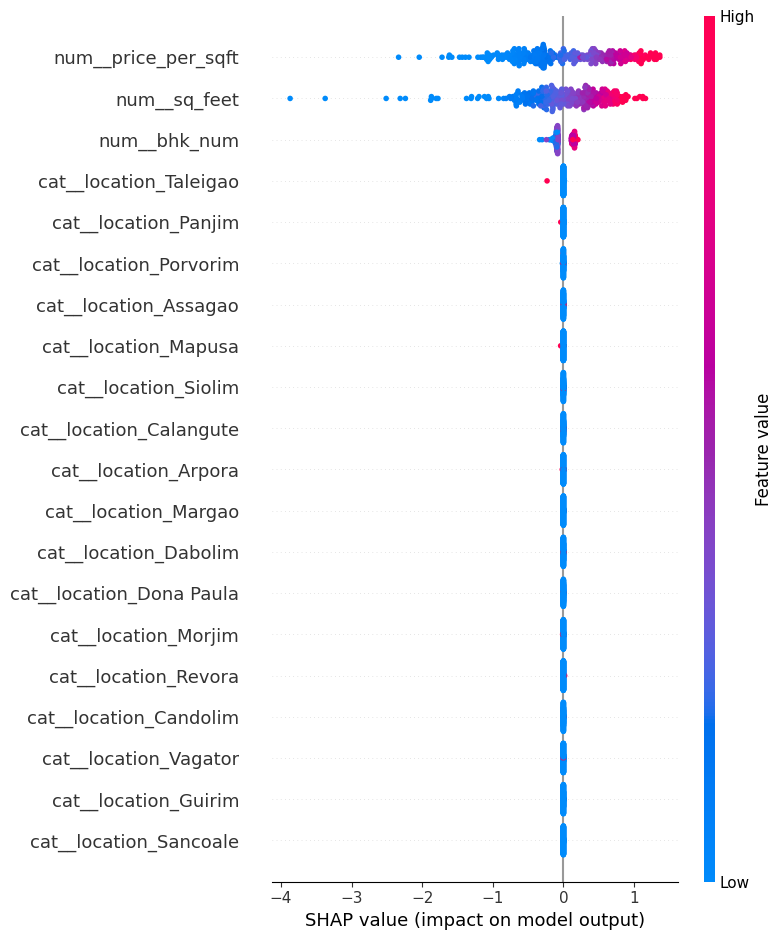

In [24]:
# ---------- SHAP: safe transform + explain ----------
import numpy as np
import shap
from scipy import sparse

# 1) transform the training data with the fitted preprocessor
X_train_trans = preprocessor.transform(X_train)  # might be sparse or ndarray

# 2) convert to dense float array if needed
if sparse.issparse(X_train_trans):
    X_train_arr = X_train_trans.toarray().astype(float)
else:
    X_train_arr = np.asarray(X_train_trans, dtype=float)

print("Transformed shape:", X_train_arr.shape, "dtype:", X_train_arr.dtype)

# 3) get feature names (sklearn >=1.0 supports get_feature_names_out on ColumnTransformer)
try:
    feature_names = preprocessor.get_feature_names_out()
except Exception:
    # fallback: build names manually
    num_feats = preprocessor.transformers_[0][2]  # numeric feature list/index
    cat_name = preprocessor.transformers_[1][0]   # just placeholder
    # Try to extract onehot feature names if possible
    try:
        ohe = preprocessor.named_transformers_['cat']
        ohe_names = list(ohe.get_feature_names_out(['location']))
    except Exception:
        ohe_names = ['loc_'+str(i) for i in range(X_train_arr.shape[1] - len(num_feats))]
    feature_names = list(num_feats) + ohe_names

print("Number of feature names:", len(feature_names))

# 4) sample a subset to keep SHAP fast
n_sample = 300
idx = np.random.RandomState(42).choice(X_train_arr.shape[0], min(n_sample, X_train_arr.shape[0]), replace=False)
X_sample = X_train_arr[idx]

# 5) prepare explainer & compute shap values (handle different SHAP APIs)
rf = model_rf.named_steps['regressor']

explainer = shap.TreeExplainer(rf)
# try newer API (returns Explanation object), fall back to old
try:
    shap_expl = explainer(X_sample)
    shap_values = shap_expl.values
    print("SHAP returned Explanation object.")
except Exception:
    shap_values = explainer.shap_values(X_sample)
    print("SHAP returned raw array.")

print("shap_values shape:", np.shape(shap_values))

# 6) summary plot
# If shap_values is list (like for classification), take appropriate index; for regression it's an array.
if isinstance(shap_values, list):
    sv = shap_values[0]
else:
    sv = shap_values

shap.summary_plot(sv, X_sample, feature_names=feature_names)
